In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 
plt.rcParams.update({
    "text.usetex": True})

In [147]:
path = '/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Batch_size_gradient_variance/Weights_Data/delta'
file_names = os.listdir(path)
batch_sizes = [2**j for j in range(2,10)]

#Split the File names into lists of standard deviations or means 
mean_file = []
std_file = []
for i,file in enumerate(file_names):
    if file[-7]=='r':
        mean_file.append(file)
    else:
        std_file.append(file) 
  

In [148]:
file_names

['weight_delta_batch_size_64rms.csv',
 'weight_delta_batch_size_8std.csv',
 'weight_delta_batch_size_64std.csv',
 'weight_delta_batch_size_4std.csv',
 'weight_delta_batch_size_128rms.csv',
 'weight_delta_batch_size_16rms.csv',
 'weight_delta_batch_size_256rms.csv',
 'weight_delta_batch_size_32rms.csv',
 'weight_delta_batch_size_4rms.csv',
 'weight_delta_batch_size_8rms.csv',
 'weight_delta_batch_size_32std.csv',
 'weight_delta_batch_size_512rms.csv',
 'weight_delta_batch_size_128std.csv',
 'weight_delta_batch_size_512std.csv',
 'weight_delta_batch_size_16std.csv',
 'weight_delta_batch_size_256std.csv']

In [151]:
def batch_size_from_filename(file_name): #Collect batch size from file name
    return int(file_name[24:-7]) #24 for deltas
#batch_size_from_filename(file_names[0])

In [152]:
#Rather than set of files set of numpy arrays with dict key = batch size
def file_list_to_dic(file_list): #dic key is batch size each batch size contains an array of dimentions  (epochs,layers) 
    dic = {}
    for file in file_list:
        batch_size = batch_size_from_filename(file)
        fpath = os.path.join(path,file)
        data = np.loadtxt(fpath,delimiter=',')
        dic.update({batch_size:data}) 
    return dic
def dict_to_array(dict):
    keys_in_order = sorted(dict.keys())
    new_dim = len(dict.items())
    [d0,d1] = (dict[keys_in_order[0]]).shape
    array = np.zeros((new_dim,d0,d1)) 
    for i,key in enumerate(keys_in_order):
        array[i] = dict[key]
    return array


In [153]:
means = file_list_to_dic(mean_file)
stds = file_list_to_dic(std_file)
means_array = dict_to_array(means)
stds_array  = dict_to_array(stds)

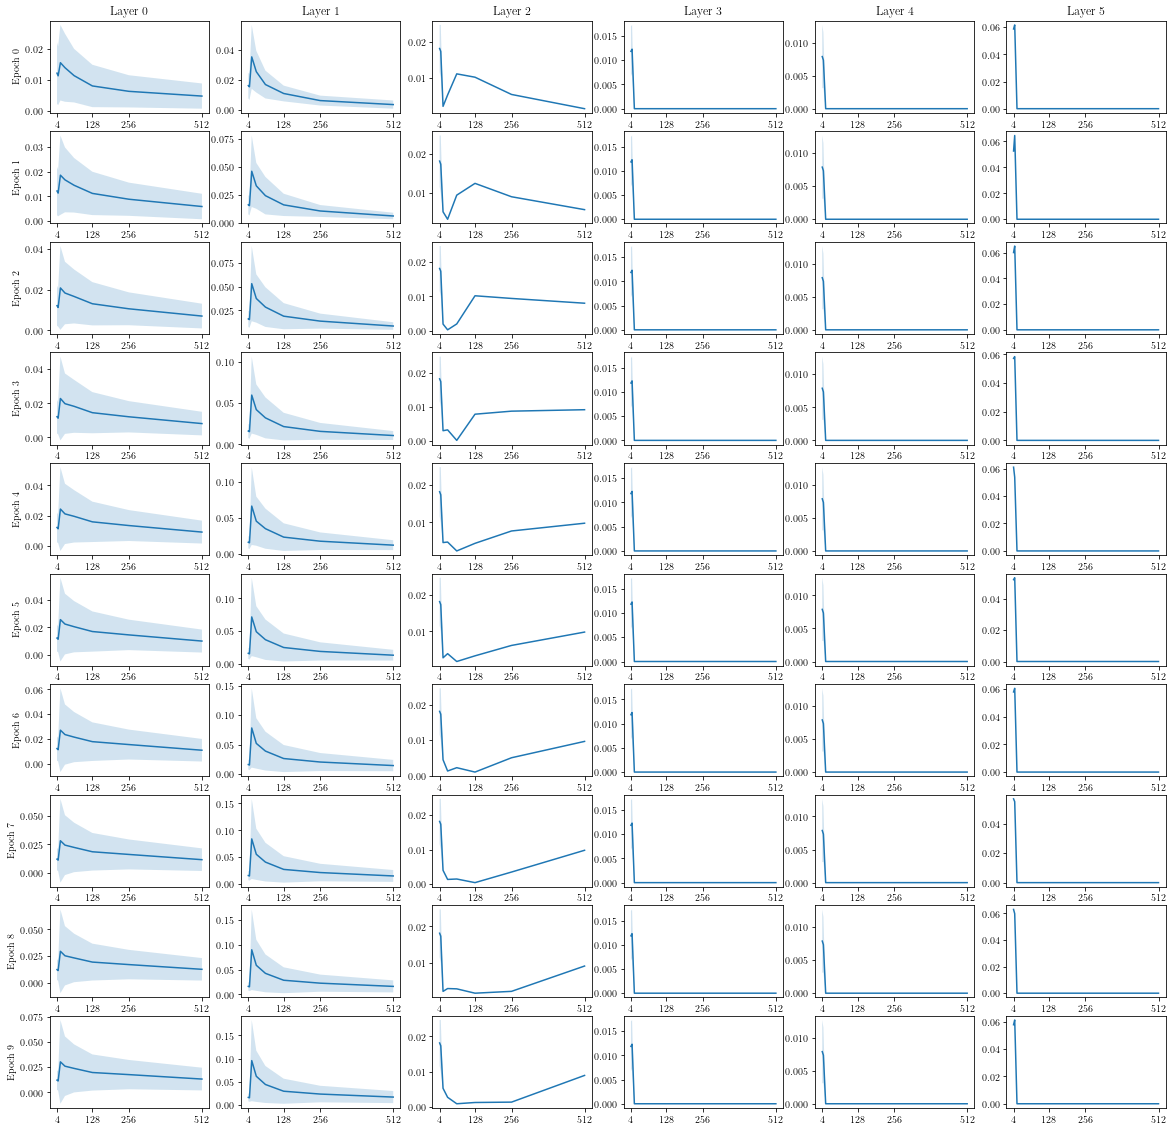

In [154]:
##Plotting
[epochs, layers] = means[4].shape

fig,ax = plt.subplots(epochs,layers,figsize = (20,20),sharey = False)
for epoch in range(epochs):
    for layer in range(layers):
        sigma_plus  = means_array[:,epoch,layer] + stds_array[:,epoch,layer]
        sigma_minus = means_array[:,epoch,layer] - stds_array[:,epoch,layer]
        ax[epoch,layer].plot(batch_sizes,means_array[:,epoch,layer])
        ax[epoch,layer].fill_between(batch_sizes,sigma_plus,sigma_minus, alpha = 0.2)
        ax[epoch,layer].set_xticks([4,128,256,512])
        ax[0,layer].set_title('Layer {}'.format(layer))
    ax[epoch,0].set_ylabel('Epoch {}'.format(epoch))
        
    
